# Import Library

In [1112]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data
## Read data


In [1113]:
data = pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Deskripsi Data

In [1114]:
# Melihat data secara lengkap
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Melihat missing values

In [1115]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Pre-processing Data
### 1. Menghapus kolom yang tidak diperlukan

In [1116]:
# Menghapus kolom yang tidak diperlukan
data = data.drop(columns=['Ticket','Cabin'])

### 2. Menangani missing values

In [1117]:
# Mengisi missing values pada kolom 'Age' dengan median
data['Age'] = data['Age'].fillna(data['Age'].median())

In [1118]:
# Mengisi missing values pada kolom 'Embarked' dengan mode (nilai yang paling sering muncul)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [1119]:
# Menghapus baris dengan missing values pada kolom 'Fare' jika ada
data = data.dropna(subset=['Fare'])

### 3. Menyaring Data yang Tidak Konsisten atau Duplikat

In [1120]:
# Menyaring data yang tidak konsisten atau duplikat
# Menghapus baris duplikat
data = data.drop_duplicates()

### 4. Menyaring data yang tidak relevan atau tidak logis (opsional)

In [1121]:
# Misalnya, jika ada nilai 'Age' negatif, kita bisa membuangnya
data = data[data['Age'] >= 0]

# Menyimpan dataset yang sudah dibersihkan

In [1122]:
# Menyimpan dataset yang sudah dibersihkan
data.to_csv('train_cleaned.csv', index=False)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


# Melihat missing values

In [1123]:
# Melihat missing values 
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Exploratory Data Analysis (EDA)
### Analisis kolom Survived

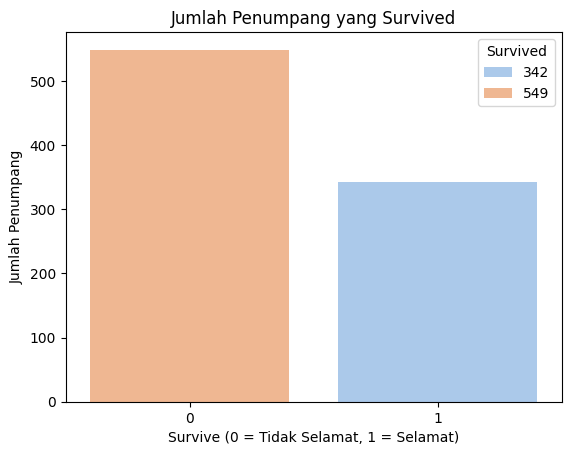

In [1124]:
# Menghitung jumlah penumpang yang survived (0 = tidak selamat, 1 = selamat)
survived_counts = data['Survived'].value_counts()
sns.barplot(x=survived_counts.index, y=survived_counts.values, hue=survived_counts, palette='pastel')
plt.title('Jumlah Penumpang yang Survived')
plt.xlabel('Survive (0 = Tidak Selamat, 1 = Selamat)')
plt.ylabel('Jumlah Penumpang')
plt.show()

### Analisis Kolom Pclass

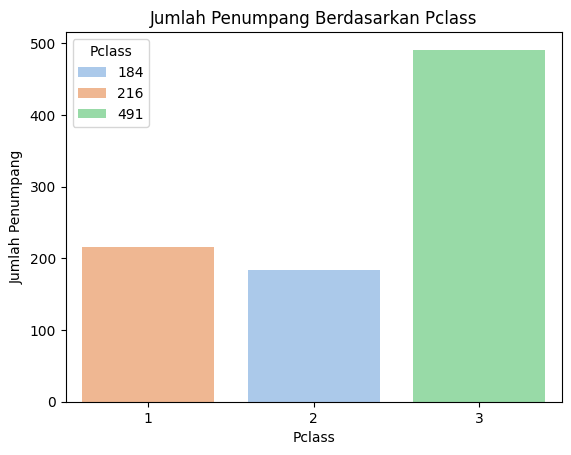

In [1125]:
# Menghitung jumlah penumpang berdasarkan kelas sosial
pclass_counts = data['Pclass'].value_counts()
sns.barplot(x=pclass_counts.index, y=pclass_counts.values, hue=pclass_counts, palette='pastel')
plt.title('Jumlah Penumpang Berdasarkan Pclass')
plt.xlabel('Pclass')
plt.ylabel('Jumlah Penumpang')
plt.show()

### Analisis Penumpang Selamat pada berdasarkan kelas sosial

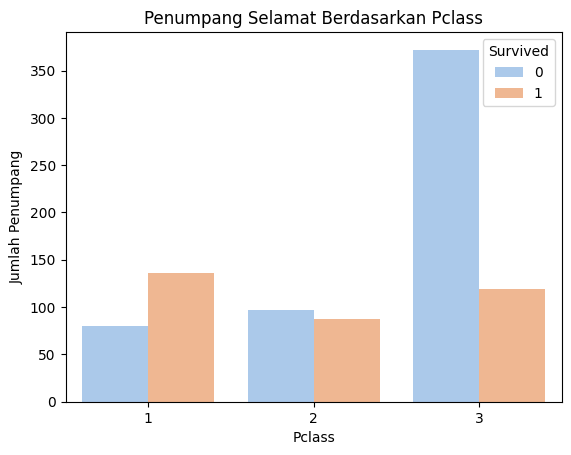

In [1126]:
# Jumlah penumpang survive bersadarkan kelas sosial penumpang
sns.countplot(data=data, x='Pclass', hue='Survived', palette='pastel')
plt.title('Penumpang Selamat Berdasarkan Pclass')
plt.xlabel('Pclass')
plt.ylabel('Jumlah Penumpang')
plt.show()

### Analisis Data Age 

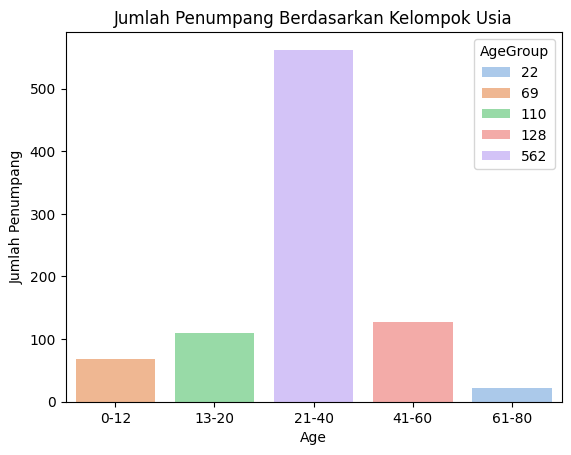

In [1127]:
# Mengelompokkan usia menjadi 5 kelompok
bins = [0, 12, 20, 40, 60, 80]  # Batasan untuk kelompok umur
labels = ['0-12', '13-20', '21-40', '41-60', '61-80']  # Label untuk kelompok umur
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)
age_counts = data['AgeGroup'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values, hue=age_counts,palette='pastel')
plt.title('Jumlah Penumpang Berdasarkan Kelompok Usia')
plt.xlabel('Age')
plt.ylabel('Jumlah Penumpang')

# Menampilkan plot
plt.show()

### Analisis Penumpang Selamat pada berdasarkan kelas sosial

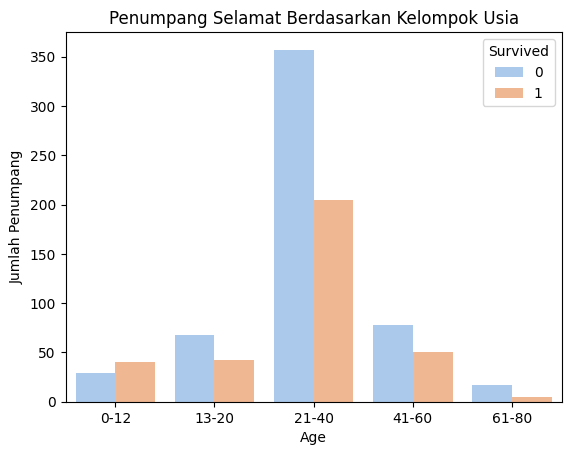

In [1128]:
# Mengelompokkan umur menjadi 5 kelompok
bins = [0, 12, 20, 40, 60, 80]  # Batasan untuk kelompok umur
labels = ['0-12', '13-20', '21-40', '41-60', '61-80']  # Label untuk kelompok umur
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Menghitung jumlah penumpang berdasarkan kelompok umur dan status survived
age_group_survived_counts = data.groupby(['AgeGroup', 'Survived']).size().reset_index(name='Count')

# Membuat bar plot menggunakan palet warna yang dipilih dengan hue='Survived'
sns.barplot(x='AgeGroup', y='Count', hue='Survived', data=age_group_survived_counts, palette='pastel')

# Menambahkan judul dan label sumbu
plt.title('Penumpang Selamat Berdasarkan Kelompok Usia')
plt.xlabel('Age')
plt.ylabel('Jumlah Penumpang')

# Menampilkan plot
plt.show()


### Analisis kolom Sex (Jenis Kelamin)

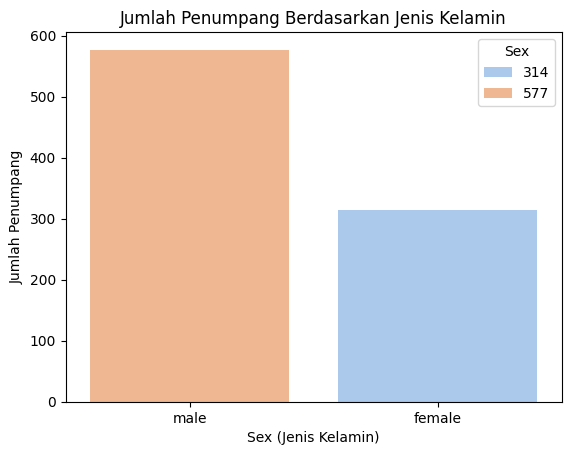

In [1129]:
# Menghitung jumlah penumpang berdasarkan jenis kelamin
sex_counts = data['Sex'].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values, hue=sex_counts, palette='pastel')
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Sex (Jenis Kelamin)')
plt.ylabel('Jumlah Penumpang')
plt.show()

### Analisis Penumpang Selamat bersadarkan jenis kelamin

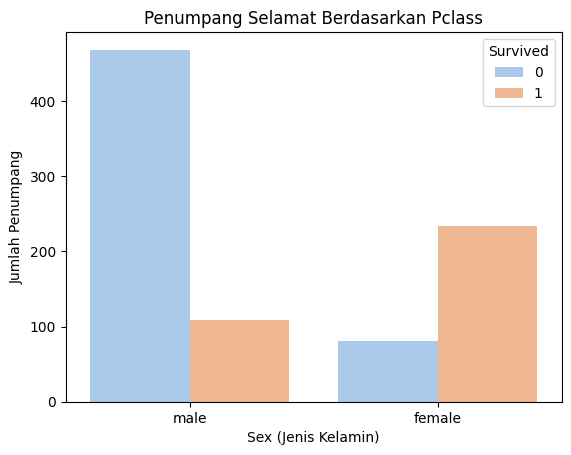

In [1130]:
# Jumlah penumpang survive bersadarkan jenis kelamin
sns.countplot(data=data, x='Sex', hue='Survived', palette='pastel')
plt.title('Penumpang Selamat Berdasarkan Pclass')
plt.xlabel('Sex (Jenis Kelamin)')
plt.ylabel('Jumlah Penumpang')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14548\1102253925.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Sex', y='Survived', palette='pastel')


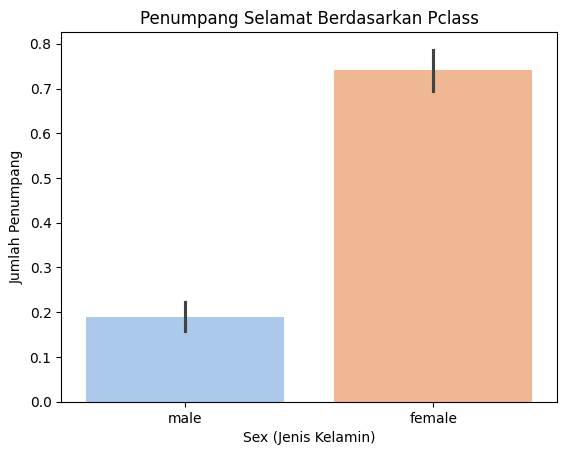

In [1131]:
sns.barplot(data=data, x='Sex', y='Survived', palette='pastel')
plt.title('Penumpang Selamat Berdasarkan Pclass')
plt.xlabel('Sex (Jenis Kelamin)')
plt.ylabel('Jumlah Penumpang')
plt.show()

### Analisis Kolom SibSp (Sibling/Spouses)

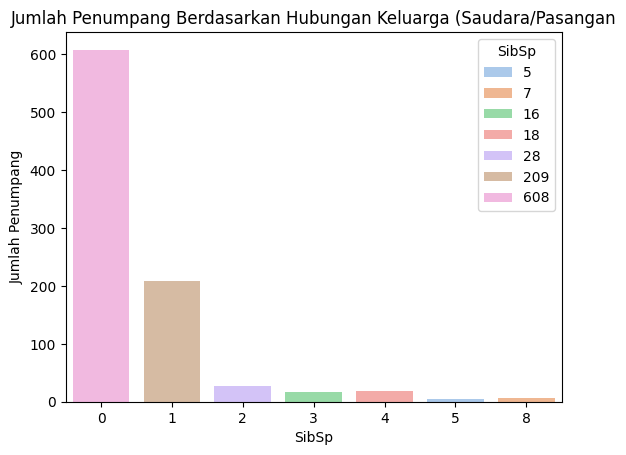

In [1132]:
# Menghitung jumlah penumpang berdasarkan Saudara atau Pasangan 
sibsp_counts = data['SibSp'].value_counts()
sns.barplot(x=sibsp_counts.index, y=sibsp_counts.values, hue=sibsp_counts, palette='pastel')
plt.title('Jumlah Penumpang Berdasarkan Hubungan Keluarga (Saudara/Pasangan')
plt.xlabel('SibSp')
plt.ylabel('Jumlah Penumpang')
plt.show()

### Analisis Penumpang Selamat Berdasarkan Hubungan (Saudara/Pasangan)

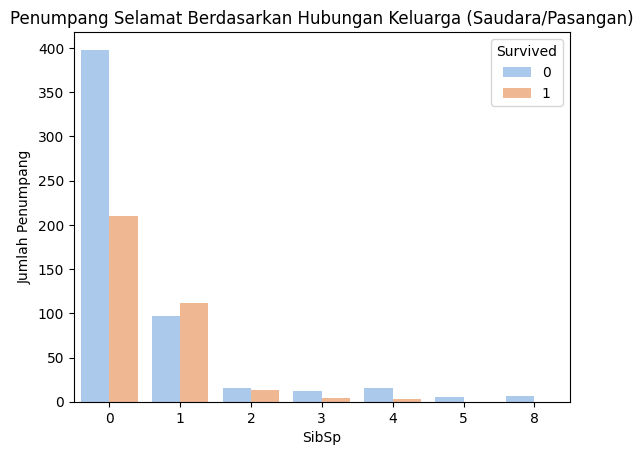

In [1133]:
# Jumlah penumpang survive bersadarkan Hubungan (Saudara/Pasangan)
sns.countplot(data=data, x='SibSp', hue='Survived', palette='pastel')
plt.title('Penumpang Selamat Berdasarkan Hubungan Keluarga (Saudara/Pasangan)')
plt.xlabel('SibSp')
plt.ylabel('Jumlah Penumpang')
plt.show()

### Analisis Kolom Parch (Parent/Child)

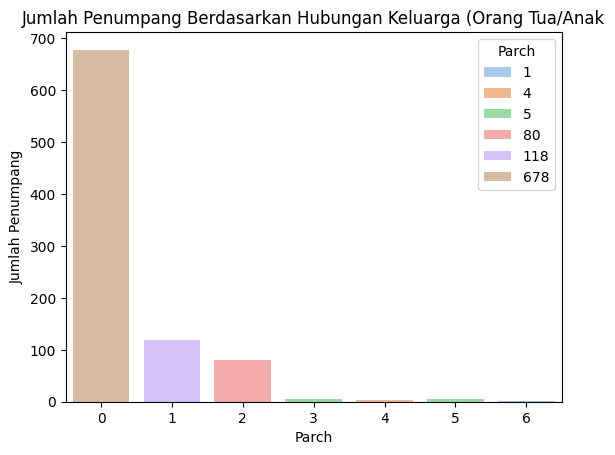

In [1134]:
# Menghitung jumlah penumpang berdasarkan jumlah Orang tua atau Anak 
parch_counts = data['Parch'].value_counts()
sns.barplot(x=parch_counts.index, y=parch_counts.values, hue=parch_counts, palette='pastel')
plt.title('Jumlah Penumpang Berdasarkan Hubungan Keluarga (Orang Tua/Anak')
plt.xlabel('Parch')
plt.ylabel('Jumlah Penumpang')
plt.show()

### Analisis Penumpang Selamat Berdasarkan Hubungan (Saudara/Pasangan)

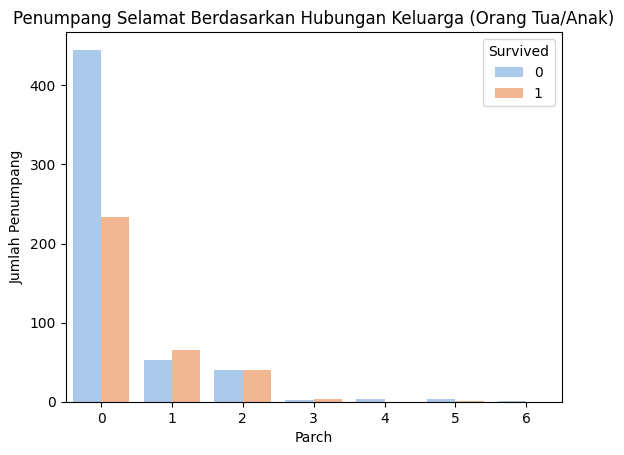

In [1135]:
# Jumlah penumpang survive bersadarkan Hubungan (Saudara/Pasangan)
sns.countplot(data=data, x='Parch', hue='Survived', palette='pastel')
plt.title('Penumpang Selamat Berdasarkan Hubungan Keluarga (Orang Tua/Anak)')
plt.xlabel('Parch')
plt.ylabel('Jumlah Penumpang')
plt.show()

### Analisis Kolom Fare

Text(0, 0.5, 'Jumlah Penumpang')

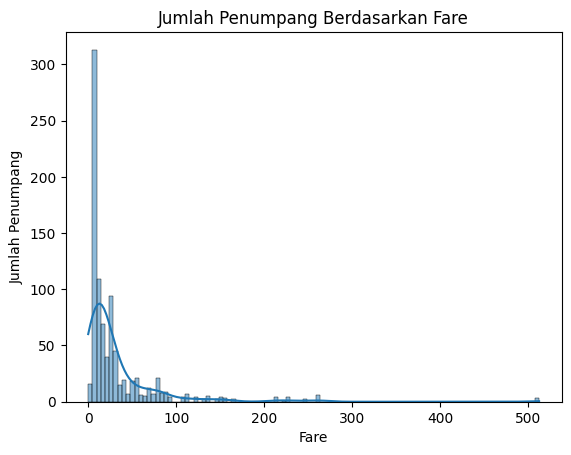

In [1136]:
# Menghitung jumlah penumpang berdasarkan jumlah tarif tiket penumpang
sns.histplot(data=data, x='Fare', kde=True,)
plt.title('Jumlah Penumpang Berdasarkan Fare')
plt.xlabel('Fare')
plt.ylabel('Jumlah Penumpang')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14548\1944991259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Pclass', y='Fare', palette='pastel')


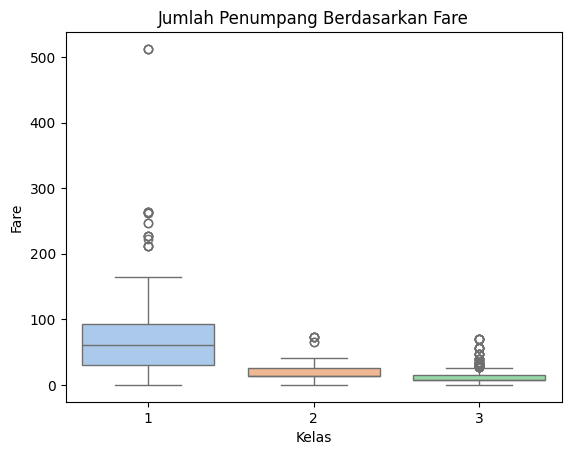

In [1137]:
# Box plot distribusi fare berdasarkan kelas
sns.boxplot(data=data, x='Pclass', y='Fare', palette='pastel')
plt.title('Jumlah Penumpang Berdasarkan Fare')
plt.xlabel('Kelas')
plt.ylabel('Fare')
plt.show()

### Analisis Penumpang Selamat Berdasarkan Hubungan Keluarga (Orang Tua/Anak)


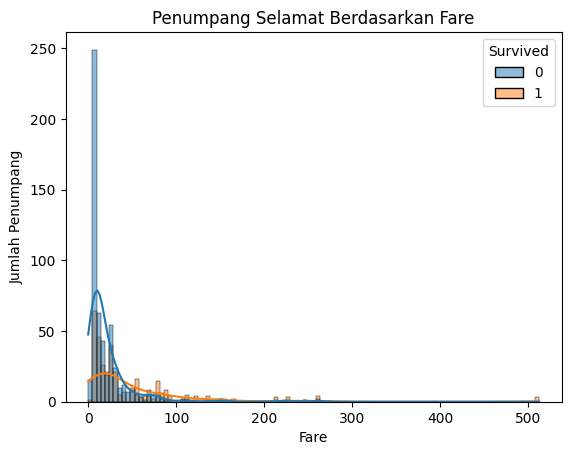

In [1138]:
# Jumlah penumpang survive bersadarkan Hubungan (Saudara/Pasangan)
sns.histplot(data=data, x='Fare', hue='Survived', kde=True)
plt.title('Penumpang Selamat Berdasarkan Fare')
plt.xlabel('Fare')
plt.ylabel('Jumlah Penumpang')
plt.show()

### Analisis Kolom Embarked

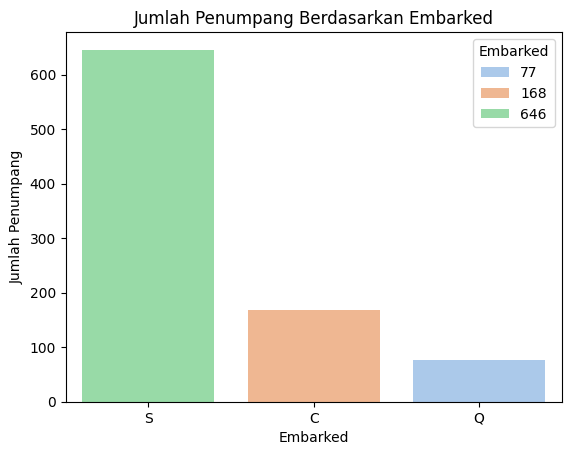

In [1139]:
# Menghitung jumlah penumpang berdasarkan Titik Keberangkatan
embarked_counts = data['Embarked'].value_counts()
sns.barplot(x=embarked_counts.index, y=embarked_counts.values, hue=embarked_counts, palette='pastel')
plt.title('Jumlah Penumpang Berdasarkan Embarked')
plt.xlabel('Embarked')
plt.ylabel('Jumlah Penumpang')
plt.show()

### Analisis Penumpang Selamat Berdasarkan Titik Keberangkatan (Pelabuhan))

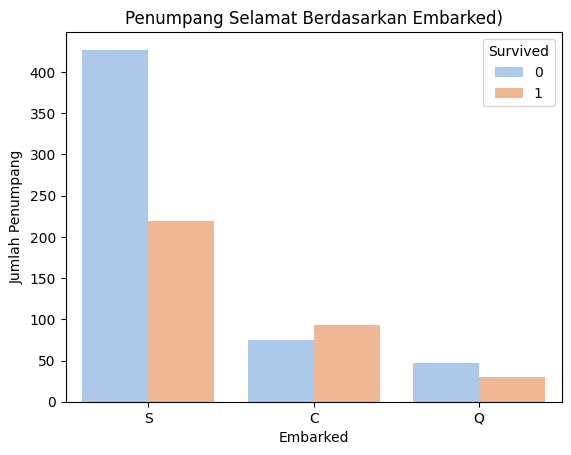

In [1140]:
# Menghitung jumlah penumpang berdasarkan Titik Keberangkatan
sns.countplot(data=data, x='Embarked', hue='Survived', palette='pastel')
plt.title('Penumpang Selamat Berdasarkan Embarked)')
plt.xlabel('Embarked')
plt.ylabel('Jumlah Penumpang')
plt.show()

In [1141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

# Feature Engineering
### Label Encoder untuk mengubah data kategorik menjadi numerik

In [1142]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [1143]:
# Menyimpan dataset yang sudah dibersihkan
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,21-40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,21-40
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,21-40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,21-40
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,21-40


# Feature Selection

In [1144]:
# Split data into features and target 
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

### Data features

In [1145]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


### Data Survive

In [1146]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Pembagian Data Train dan Data Test

In [1147]:
# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Train

In [1148]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [1149]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

### Data Test

In [1150]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2
773,3,1,28.0,0,0,7.2250,0
25,3,0,38.0,1,5,31.3875,2
84,2,0,17.0,0,0,10.5000,2


In [1151]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

# Modeling
### Membangun Model Random Forest

In [1152]:
import time
# Menghitung waktu pelatihan
start_time = time.time()  # Waktu mulai

from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest dengan 100 pohon keputusan
rf = RandomForestClassifier(n_estimators=100, random_state=62)

# Melatih model Random Forest dengan data training
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=62)

In [1153]:
# Membuat prediksi dengan data testing
y_pred = rf.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menampilkan laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi: 83.24%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



Confusion Matrix:
[[88 17]
 [22 52]]


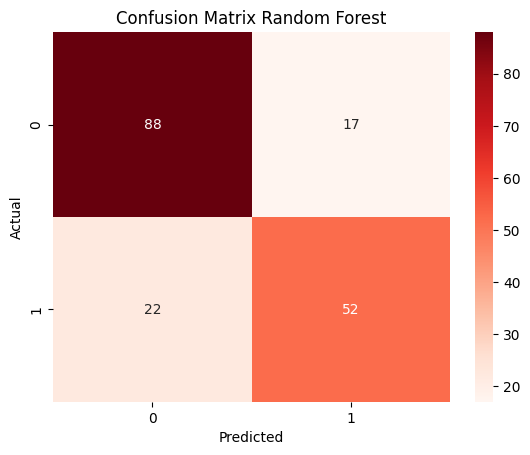

In [1183]:
# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')
plt.show()

In [1155]:
end_time = time.time()  # Waktu selesai

# Menghitung durasi pelatihan
training_time = end_time - start_time
print(f"Waktu Pelatihan: {training_time:.4f} detik")

Waktu Pelatihan: 0.5650 detik


### Membangun Model Decision Tree

In [1156]:
import time
# Menghitung waktu pelatihan
start_time = time.time()  # Waktu mulai

from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dtree = DecisionTreeClassifier(random_state=32)

# Melatih model Decision Tree dengan data training
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [1157]:
# Membuat prediksi dengan data testing
y_pred = dtree.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menampilkan laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi: 78.77%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       105
           1       0.73      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179



Confusion Matrix:
[[88 17]
 [22 52]]


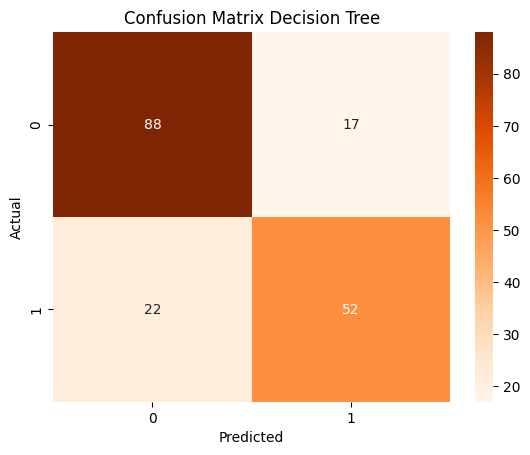

In [1181]:
# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

In [1159]:
end_time = time.time()  # Waktu selesai

# Menghitung durasi pelatihan
training_time = end_time - start_time
print(f"Waktu Pelatihan: {training_time:.4f} detik")

Waktu Pelatihan: 0.2566 detik


### Membangun Model Support Vector Machine (SVM)

In [1160]:
import time
# Menghitung waktu pelatihan
start_time = time.time()  # Waktu mulai

from sklearn.svm import SVC

# Inisialisasi model SVM dengan kernel linear
svm = SVC(kernel='linear')

# Melatih model SVM dengan data training
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [1161]:
# Membuat prediksi dengan data testing
y_pred = svm.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menampilkan laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi: 78.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



Confusion Matrix:
[[88 17]
 [22 52]]


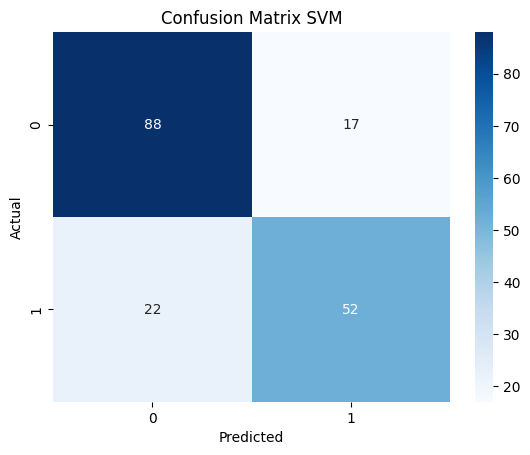

In [1180]:
# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()

In [1163]:
end_time = time.time()  # Waktu selesai

# Menghitung durasi pelatihan
training_time = end_time - start_time
print(f"Waktu Pelatihan: {training_time:.4f} detik")

Waktu Pelatihan: 8.3603 detik


### Membangun Model Naive Bayes

In [1164]:
import time
# Menghitung waktu pelatihan
start_time = time.time()  # Waktu mulai

#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

# Inisialisasi model Naive Bayes
#nb = GaussianNB()
bnb = BernoulliNB()

# Melatih model Naive Bayes dengan data training
#nb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

BernoulliNB()

In [1178]:
# Membuat prediksi dengan data testing
#y_pred = nb.predict(X_test)
y_pred = bnb.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menampilkan laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 78.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



Confusion Matrix:
[[88 17]
 [22 52]]


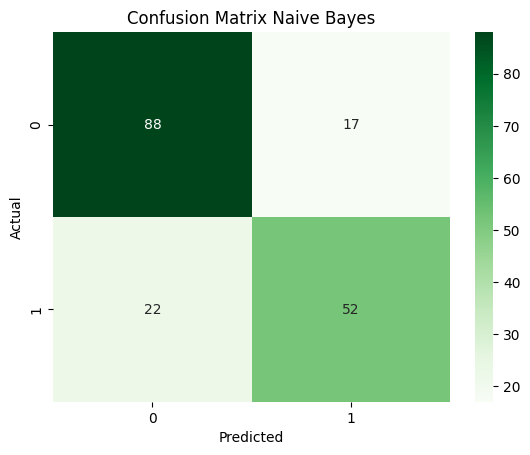

In [1179]:
# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

In [1167]:
end_time = time.time()  # Waktu selesai

# Menghitung durasi pelatihan
training_time = end_time - start_time
print(f"Waktu Pelatihan: {training_time:.4f} detik")

Waktu Pelatihan: 0.2501 detik
